In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./2021.csv').drop('Unnamed: 0', axis=1)
data['Date'] = pd.to_datetime(data['Date'])
group = data.groupby([data['Date'].dt.date])

In [3]:
sentiment = pd.concat([group.mean(), group.count()['Date']], axis=1).rename(columns={'Sentiment': 'avg_polar', 'Date': 'tweet_count'})
sentiment

,avg_polar,tweet_count
Date,,
2021-01-01,0.619149,470
2021-01-02,0.530917,469
2021-01-03,0.571429,553
2021-01-04,0.598575,842
2021-01-05,0.543668,916
...,...,...
2021-12-27,0.556797,537
2021-12-28,0.513235,680
2021-12-29,0.471698,530


In [4]:
def cast_float(x):
    first = float(x[0].replace('.', '').replace(',', '.'))
    second = float(x[1].replace('.', '').replace(',', '.'))
    third = float(x[2].replace('.', '').replace(',', '.').replace('%', ''))
    return pd.Series([first, second, third])

In [5]:
stock = pd.read_csv('../../StockAndTweetDataExtract/Stock_data/BİST_100_2021.csv')
stock['Tarih'] = pd.to_datetime(stock['Tarih'], infer_datetime_format=True)
stock.set_index('Tarih', inplace=True)
stock.drop(['Yüksek', 'Düşük', 'Hac.'], axis=1, inplace=True)
stock = stock.apply(lambda x: cast_float(x), axis=1).rename(columns={0: 'şimdi', 1: 'açılış', 2: 'fark'})
stock

,şimdi,açılış,fark
Tarih,,,
2021-12-31,1857.65,1867.71,-0.32
2021-12-30,1863.65,1895.46,-1.68
2021-12-29,1895.46,1850.48,2.43
2021-12-28,1850.48,1913.31,-2.46
2021-12-27,1897.13,1898.66,0.31
...,...,...,...
2021-01-08,1540.61,1526.51,1.21
2021-01-07,1522.24,1511.60,1.12
2021-01-06,1505.42,1501.61,1.06


In [6]:
merged = stock.merge(sentiment, right_index=True, left_index=True)
merged

,şimdi,açılış,fark,avg_polar,tweet_count
2021-12-31,1857.65,1867.71,-0.32,0.502825,354
2021-12-30,1863.65,1895.46,-1.68,0.465665,466
2021-12-29,1895.46,1850.48,2.43,0.471698,530
2021-12-28,1850.48,1913.31,-2.46,0.513235,680
2021-12-27,1897.13,1898.66,0.31,0.556797,537
...,...,...,...,...,...
2021-01-08,1540.61,1526.51,1.21,0.562334,754
2021-01-07,1522.24,1511.60,1.12,0.535849,795
2021-01-06,1505.42,1501.61,1.06,0.557471,870
2021-01-05,1489.56,1492.19,-0.39,0.543668,916


<AxesSubplot:>

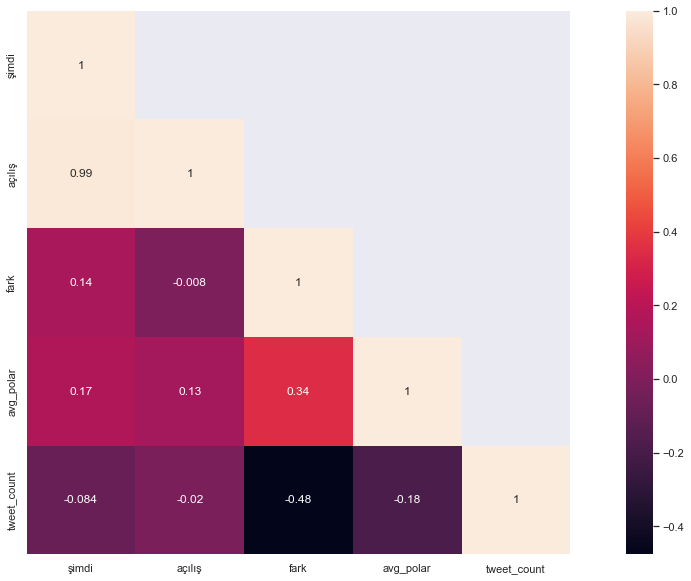

In [7]:
cor_mat= merged.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
sns.set(font_scale=1)
fig.set_size_inches(20,10)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [8]:
merged.to_csv('2021_final.csv')